In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 불러오기

In [92]:
df = pd.read_csv("C://Ai-class/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 결측치 확인 

In [95]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                결측치 개수  결측치 비율(%)
id                   0        0.0
Sex                  0        0.0
Length               0        0.0
Diameter             0        0.0
Height               0        0.0
Whole_weight         0        0.0
Shucked_weight       0        0.0
Viscera_weight       0        0.0
Shell_weight         0        0.0
Rings                0        0.0


# 라벨 인코딩 (Sex)

In [98]:
# 레이블 인코더 생성 및 적용
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


##### M → 2
##### F → 0
##### I → 1

# 상관 관계 행렬 분석

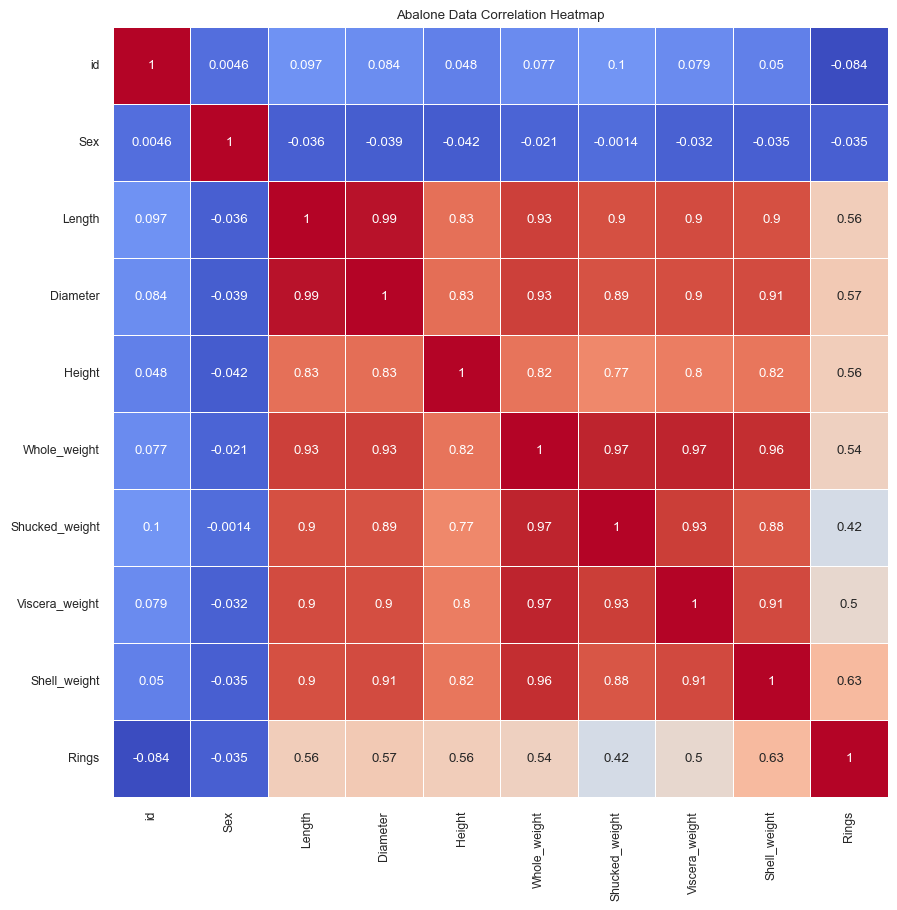

In [102]:
# 상관 관계 행렬 계산
df_corr = df.corr()

# 히트맵 출력
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title("Abalone Data Correlation Heatmap")
plt.show()

### id, Sex 컬럼 제거

# 불필요한 컬럼 제거 

In [106]:
# 삭제할 칼럼 지정
df.drop(columns=['id', 'Sex'], inplace=True)

# 변경된 데이터프레임 확인
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# X, y 분리 / 훈련, 테스트 데이터 분리

In [109]:
X = df.drop('Rings',axis=1)
y = df['Rings']

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

# 머신러닝 회귀 LinearRegression 모델 (LR)

평균제곱근오차 4.731248881502662


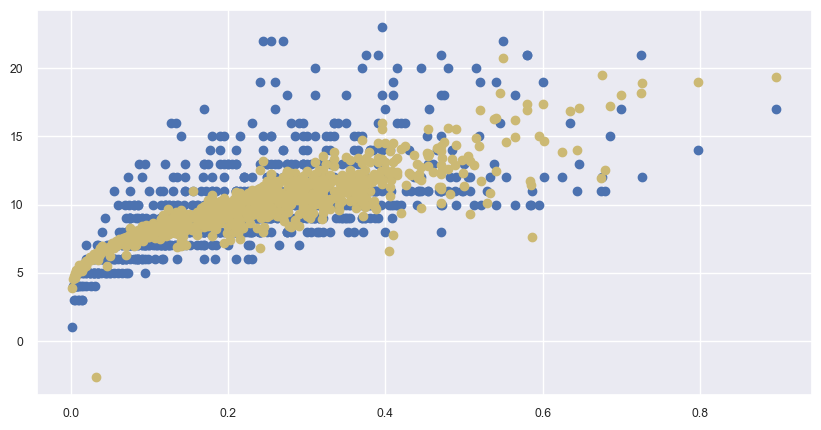

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
plt.show()        

# 머신러닝 회귀 DecisionTree 모델 (DT)

평균제곱근오차 8.175837320574162


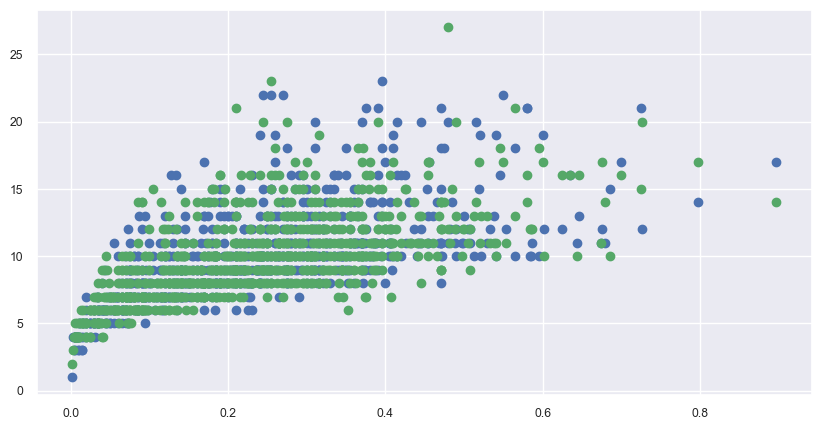

In [119]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()       

# 머신러닝 회귀 RandomForest 모델 (RF)

평균제곱근오차 4.496201196172249


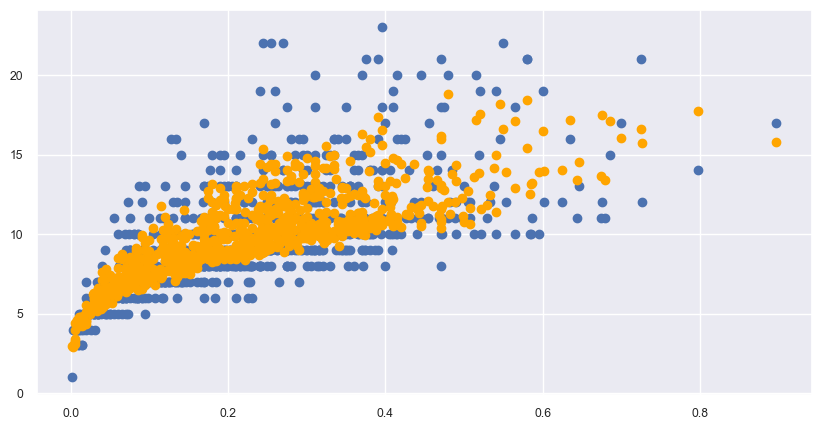

In [122]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')
plt.show()  

# 머신러닝 회귀 SVR 모델

평균제곱근오차 5.445573615039833


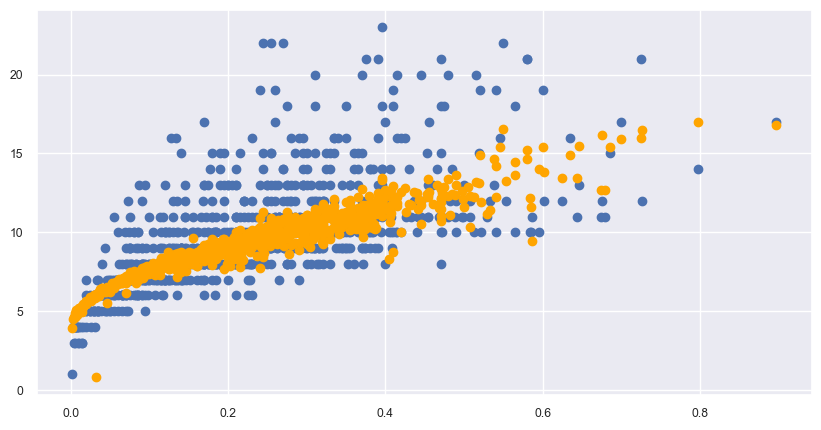

In [125]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')
plt.show()  

# 딥러닝 회귀 (텐서플로)

In [128]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# 데이터 스케일링

In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 원핫 인코딩

### 데이터 타입	예시	원핫 인코딩?
#### 명목형 (순서 없음)	성별, 지역, 색상	✅ 예
#### 순서형 (순서 있음)	등급, 학력, 만족도	❌ 아니요 (→ 숫자 인코딩)
#### 수치형	나이, 키, 무게	❌ 필요 없음

##### >> Sex 컬럼을 제거했기 때문에 필요없음

# 모델 정의

In [147]:
model = Sequential()

model.add(Dense(20, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate = 0.01), 'mse')

model.summary()

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,631 (6.37 KB)

 Trainable params: 1,631 (6.37 KB)

 Non-trainable params: 0 (0.00 B)

### input_shape > X_train.shape[1]
### 회귀이기 떄문에 마지막 출력층에 활성화 함수 X, 1 고정
### + mse 

In [149]:
#예측 시작
model_history = model.fit(x = X_train, y = y_train, epochs = 20, batch_size = 23, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

print("예측값:", y_pred)
print("실제값:", y_test)

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 23.9081 - val_loss: 6.3745
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.9722 - val_loss: 5.1055
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5053 - val_loss: 4.8146
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3494 - val_loss: 4.4730
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0607 - val_loss: 5.2643
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9095 - val_loss: 4.5167
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9974 - val_loss: 6.0421
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0110 - val_loss: 4.6088
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9437 - val_loss: 4.3219
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0209 - val_loss: 4.4614
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0253 - val_loss: 4.6687
Epoch 12/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


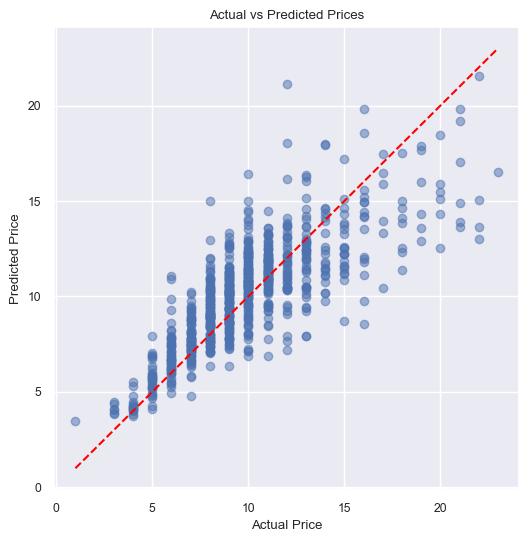

In [151]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # 대각선 기준선
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.show()

y_pred = model.predict(X_test).flatten()
plot_predictions(y_test, y_pred)